In [1]:
import os
# os.environ["JAX_PLATFORM_NAME"] = "cpu"

import jax
import jax.numpy as jnp
from jax.tree_util import Partial
key = jax.random.key(137)
import matplotlib.pyplot as plt

from scipy.spatial import KDTree
import jaxkd as jk

KD tree neighbors:     [  0 113 216 254  94  18]
Brute force neighbors: [  0 113 216 254  94  18]


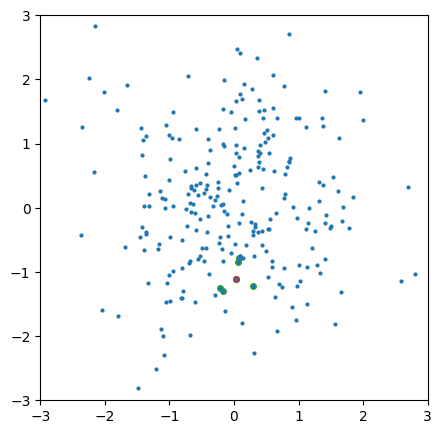

In [9]:
# Visualize with a few points
n_points = 256
key, subkey = jax.random.split(key)
points = jax.random.normal(subkey, shape=(n_points, 2))
tree = jk.make_kd_tree(points)
neighbors, distances = jk.query_neighbors(points[0], points, *tree, k=6)

print('KD tree neighbors:    ', neighbors)
print('Brute force neighbors:', jnp.argsort(jnp.linalg.norm(points - points[0], axis=1))[:len(neighbors)])

plt.figure(figsize=(5,5))
plt.scatter(*points[neighbors].T, s=16, c='C2')
plt.scatter(*points[0], s=16, c='C3')
plt.scatter(*points.T, s=4, c='C0')
plt.gca().set(xlim=(-3, 3), ylim=(-3, 3))
plt.show()

In [12]:
# Test speed (run a second time after jit to see real speed)
n_points = 1024 * 1024
key, subkey = jax.random.split(key)
points = jax.random.uniform(subkey, shape=(n_points, 2))
tree = jk.make_kd_tree(points)
tree[0]

Array([865013, 531231, 650992, ..., 297713, 417590,  78579], dtype=int32)

In [13]:
# Find neighbors for all points (run a second time after jit to see reals speed)
neighbors, distances = jax.vmap(lambda query: jk.query_neighbors(query, points, *tree, k=6))(points)
neighbors

Array([[      0,  987379,  686711,   36007,  214770, 1048463],
       [      1,  185368,   75643,  230145,  330228,  130114],
       [      2,  921894,  103757,  285922,  367619,  621254],
       ...,
       [1048573,  937770,  914156,  850317,   74917,  324114],
       [1048574,  307814,  990973,  773320,  496305,  862537],
       [1048575,  281426,  837957,   76775,  628376,  632009]],      dtype=int32)

In [14]:
# Build scipy KDTree
scipy_tree = KDTree(points)

In [15]:
# Find neighbors for all points
scipy_tree.query(points, k=6, workers=-1)[1]

array([[      0,  987379,  686711,   36007,  214770, 1048463],
       [      1,  185368,   75643,  230145,  330228,  130114],
       [      2,  921894,  103757,  285922,  367619,  621254],
       ...,
       [1048573,  937770,  914156,  850317,   74917,  324114],
       [1048574,  307814,  990973,  773320,  496305,  862537],
       [1048575,  281426,  837957,   76775,  628376,  632009]],
      shape=(1048576, 6))